# Clase 6 - Ejercicio

In [1]:
## Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Breast Cancer (METABRIC, Nature 2012 & Nat Commun 2016)




Origen del dataset (https://www.cbioportal.org/study/clinicalData?id=brca_metabric)

La base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama (METABRIC) es un proyecto Canadá-Reino Unido que contiene datos de secuenciación específica de 1980 muestras primarias de cáncer de mama. Los datos clínicos y genómicos se descargaron de cBioPortal.

El conjunto de datos fue recopilado por el profesor Carlos Caldas del Cambridge Research Institute y el profesor Sam Aparicio del British Columbia Cancer Center en Canadá y publicado en Nature Communications (Pereira et al., 2016). También apareció en varios artículos, incluidos Nature y otros:
- [Associations between genomic stratification of breast cancer and centrally reviewed tumor pathology in the METABRIC cohort](https://www.nature.com/articles/s41523-018-0056-8)
- [Predicting Outcomes of Hormone and Chemotherapy in the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) Study by Biochemically-inspired Machine Learning](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/)

## Desde CBioPortal:

- Clinical attributes in the dataset: 31 values
- Genetic attributes in the dataset: The genetics part of the dataset contains m-RNA levels z-score for 331 genes, and mutation for 175 genes.

### Genetic attributes in the dataset:

| Name                           | Type   | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ------------------------------ | ------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| patient_id                     | object | Patient ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| age_at_diagnosis               | float  | Age of the patient at diagnosis time                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| type_of_breast_surgery         | object | Breast cancer surgery type: 1- MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer. 2- BREAST CONSERVING, which refers to a urgery where only the part of the breast that has cancer is removed                                                                                                                                                                                                                             |
| cancer_type                    | object | Breast cancer types: 1- Breast Cancer or 2- Breast Sarcoma                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| cancer_type_detailed           | object | Detailed Breast cancer types: 1- Breast Invasive Ductal Carcinoma 2- Breast Mixed Ductal and Lobular Carcinoma 3- Breast Invasive Lobular Carcinoma 4- Breast Invasive Mixed Mucinous Carcinoma 5- Metaplastic Breast Cancer                                                                                                                                                                                                                                                                       |
| cellularity                    | object | Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters                                                                                                                                                                                                                                                                                                                                                                |
| chemotherapy                   | int    | Whether or not the patient had chemotherapy as a treatment (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                |
| pam50_+_claudin-low_subtype    | object | Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive), HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). The claudin-low breast cancer subtype is defined by gene expression characteristics, most prominently: Low expression of cell–cell adhesion genes, high expression of epithelial–mesenchymal transition (EMT) genes, and stem cell-like/less differentiated gene expression patterns |
| cohort                         | float  | Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5)                                                                                                                                                                                                                                                                                                                                                                                                   |
| er_status_measured_by_ihc      | float  | To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored) (positive/negative)                                                                                                                                                                                                                           |
| er_status                      | object | Cancer cells are positive or negative for estrogen receptors                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| neoplasm_histologic_grade      | int    | Determined by pathology by looking the nature of the cells, do they look aggressive or not (It takes a value from 1 to 3)                                                                                                                                                                                                                                                                                                                                                                          |
| her2_status_measured_by_snp6   | object | To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing)                                                                                                                                                                                                                                                                                                                                                                        |
| her2_status                    | object | Whether the cancer is positive or negative for HER2                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| tumor_other_histologic_subtype | object | Type of the cancer based on microscopic examination of the cancer tissue (It takes a value of 'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic' )                                                                                                                                                                                                                                                                                           |
| hormone_therapy                | int    | Whether or not the patient had hormonal as a treatment (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| inferred_menopausal_state      | object | Whether the patient is is post menopausal or not (post/pre)                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| integrative_cluster            | object | Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')                                                                                                                                                                                                                                                                                                                                                 |
| primary_tumor_laterality       | object | Whether it is involving the right breast or the left breast                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| lymph_nodes_examined_positive  | float  | To take samples of the lymph node during the surgery and see if there were involved by the cancer                                                                                                                                                                                                                                                                                                                                                                                                  |
| mutation_count                 | float  | Number of gene that has relevant mutations                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| nottingham_prognostic_index    | float  | It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.                                                                                                                                                                                                                                                                         |
| oncotree_code                  | object | The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.                                                                                                                                                                                                                                                                 |
| overall_survival_months        | float  | Duration from the time of the intervention to death                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| overall_survival               | object | Target variable wether the patient is alive of dead.                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| pr_status                      | object | Cancer cells are positive or negative for progesterone receptors                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| radio_therapy                  | int    | Whether or not the patient had radio as a treatment (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| 3-gene_classifier_subtype      | object | Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+'                                                                                                                                                                                                                                                                                                                                                                      |
| tumor_size                     | float  | Tumor size measured by imaging techniques                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| tumor_stage                    | float  | Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread                                                                                                                                                                                                                                                                                                                                                                                             |
| death_from_cancer              | int    | Wether the patient's death was due to cancer or not (yes/no)                                                                                                                                                                                                                                                                                                                                                                                                                                       |


### Genetic attributes in the dataset:
The genetics part of the dataset contains m-RNA levels z-score for 331 genes, and mutation for 175 genes.

#### What are mRNA?
The DNA molecules attached to each slide act as probes to detect gene expression, which is also known as the transcriptome or the set of messenger RNA (mRNA) transcripts expressed by a group of genes. To perform a microarray analysis, mRNA molecules are typically collected from both an experimental sample and a reference sample.

#### What are mRNA Z-Scores?
For mRNA expression data, The calculations of the relative expression of an individual gene and tumor to the gene's expression distribution in a reference population is done. That reference population is all samples in the study . The returned value indicates the number of standard deviations away from the mean of expression in the reference population (Z-score). This measure is useful to determine whether a gene is up- or down-regulated relative to the normal samples or all other tumor samples.

The formula is :
```
z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample
```

## Exploratory Data Analysis (EDA)

### Cargando la data

In [2]:
data = pd.read_csv("METABRIC_RNA_Mutation.csv")

C:\Users\melma\AppData\Local\Temp\ipykernel_35764\371503695.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("METABRIC_RNA_Mutation.csv")


In [3]:
## dimensiones del data set (<filas>, <columnas>)
data.shape

(1904, 693)

In [4]:
## head()
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### Explorando la data clinica

In [5]:
columnas_data_clinica = ['patient_id','age_at_diagnosis',
                         'type_of_breast_surgery','cancer_type',
                         'cancer_type_detailed','cellularity','chemotherapy',
                         'pam50_+_claudin-low_subtype','cohort','er_status_measured_by_ihc',
                         'er_status','neoplasm_histologic_grade','her2_status_measured_by_snp6',
                         'her2_status','tumor_other_histologic_subtype','hormone_therapy',
                         'inferred_menopausal_state','integrative_cluster','primary_tumor_laterality',
                         'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index',
                         'oncotree_code','overall_survival_months','overall_survival','pr_status',
                         'radio_therapy','3-gene_classifier_subtype','tumor_size','tumor_stage','death_from_cancer']
print(columnas_data_clinica)

['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer']


In [6]:
data_clinica = data[columnas_data_clinica].copy()

In [7]:
data_clinica.shape

(1904, 31)

In [8]:
data_clinica.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


#### info()
Imprime un listado de columnas, cuantos valores no nulos contiene y el tipo de objeto

In [9]:
data_clinica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

#### describe()
Estadistica descriptiva de los valos numericos en el dataframe

In [10]:
data_clinica.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.420693,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.493800,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,0.000000,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,1.000000,182.000000,4.000000


#### Variable Objetivo

In [11]:
data_clinica.overall_survival

0       1
1       1
2       0
3       1
4       0
       ..
1899    1
1900    0
1901    0
1902    0
1903    0
Name: overall_survival, Length: 1904, dtype: int64

In [12]:
## value_counts
data_clinica.overall_survival.value_counts()

0    1103
1     801
Name: overall_survival, dtype: int64

**Ejercicio**: Explorar los valores y la cantidad de datos en la columna `type_of_breast_surgery`

In [13]:
data_clinica.type_of_breast_surgery.value_counts()

MASTECTOMY           1127
BREAST CONSERVING     755
Name: type_of_breast_surgery, dtype: int64

**Ejercicio**: Explorar los valores y la cantidad de datos en la columna `pam50_+_claudin-low_subtype`

In [14]:
data_clinica['pam50_+_claudin-low_subtype'].value_counts()

LumA           679
LumB           461
Her2           220
claudin-low    199
Basal          199
Normal         140
NC               6
Name: pam50_+_claudin-low_subtype, dtype: int64

**Ejercicio**: Explorar los valores y la cantidad de datos en la columna `pam50_+_claudin-low_subtype`

In [15]:
data_clinica['pam50_+_claudin-low_subtype'].value_counts()

LumA           679
LumB           461
Her2           220
claudin-low    199
Basal          199
Normal         140
NC               6
Name: pam50_+_claudin-low_subtype, dtype: int64

### Variables Numericas

array([[<Axes: title={'center': 'patient_id'}>,
        <Axes: title={'center': 'age_at_diagnosis'}>,
        <Axes: title={'center': 'chemotherapy'}>,
        <Axes: title={'center': 'cohort'}>],
       [<Axes: title={'center': 'neoplasm_histologic_grade'}>,
        <Axes: title={'center': 'hormone_therapy'}>,
        <Axes: title={'center': 'lymph_nodes_examined_positive'}>,
        <Axes: title={'center': 'mutation_count'}>],
       [<Axes: title={'center': 'nottingham_prognostic_index'}>,
        <Axes: title={'center': 'overall_survival_months'}>,
        <Axes: title={'center': 'overall_survival'}>,
        <Axes: title={'center': 'radio_therapy'}>],
       [<Axes: title={'center': 'tumor_size'}>,
        <Axes: title={'center': 'tumor_stage'}>, <Axes: >, <Axes: >]],
      dtype=object)

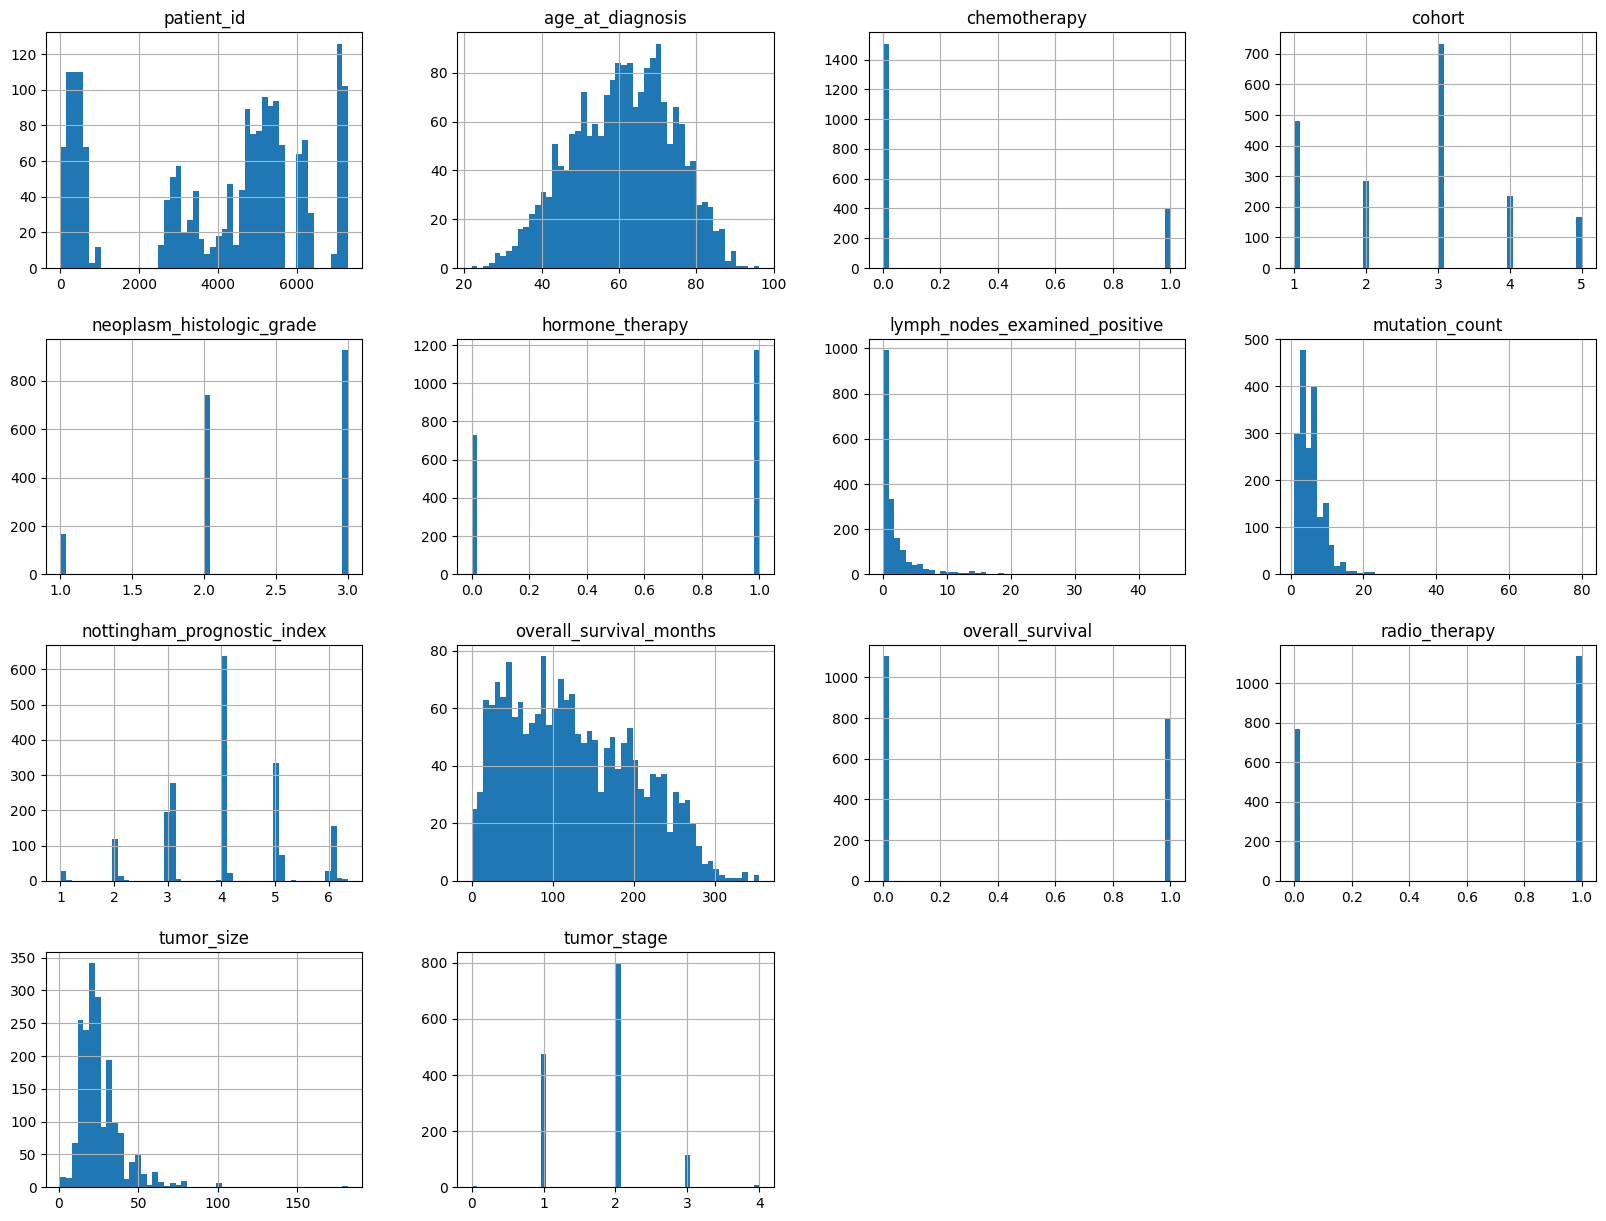

In [16]:
data_clinica.hist(bins=50, figsize=(20,15))

In [17]:
variables_numericas = ['age_at_diagnosis', 'mutation_count','lymph_nodes_examined_positive', 
                       'overall_survival_months']

### [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)


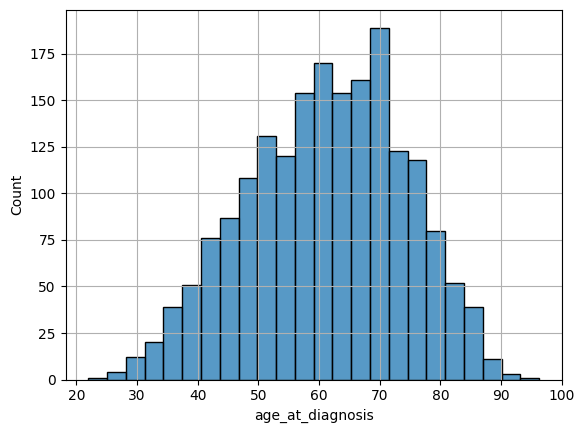

In [18]:
sns.histplot(data=data_clinica, x='age_at_diagnosis')
plt.grid()
plt.show()

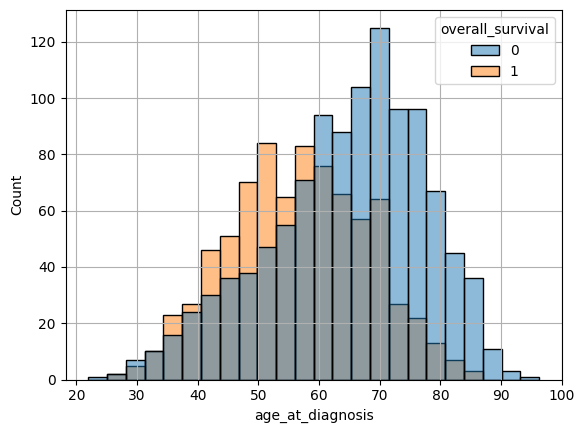

In [19]:
sns.histplot(data=data_clinica, x='age_at_diagnosis', hue="overall_survival")
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Distribucion de la variable edad')]

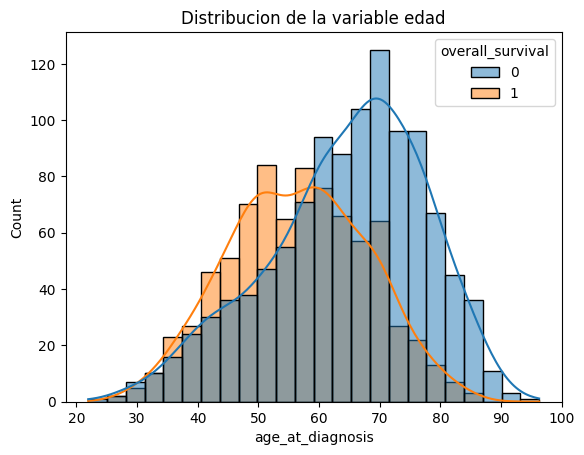

In [20]:
### kernel density estimate (KDE) 
grafico = sns.histplot(
    data=data_clinica, x='age_at_diagnosis', hue="overall_survival", 
    kde=True, fill=True
)
grafico.set(title="Distribucion de la variable edad")

[Text(0.5, 1.0, 'Distribucion de la variable edad')]

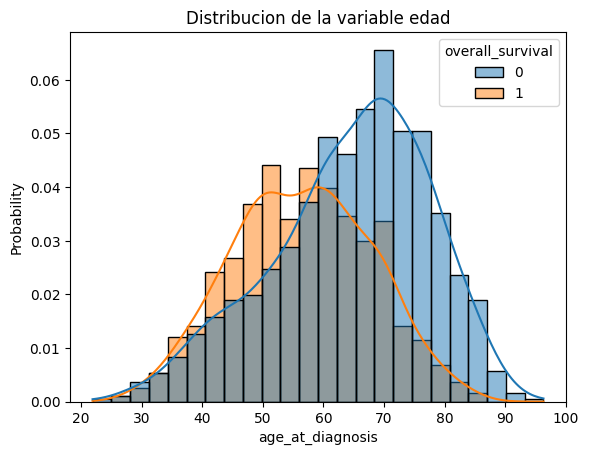

In [21]:
grafico = sns.histplot(
    data=data_clinica, x='age_at_diagnosis', hue="overall_survival", 
    kde=True, fill=True, stat='probability'
)
grafico.set(title="Distribucion de la variable edad")

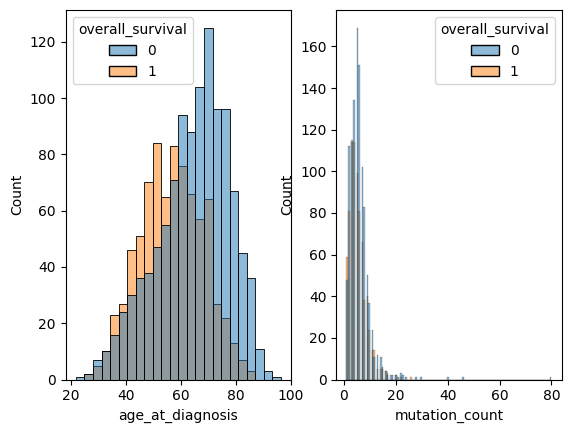

In [22]:
## plt.subplots(<filas>, <columnas>)
fig, axes = plt.subplots(1,2)

sns.histplot(data=data_clinica, x='age_at_diagnosis', hue="overall_survival", ax=axes[0])
sns.histplot(data=data_clinica, x='mutation_count', hue="overall_survival", ax=axes[1])
plt.show()

In [23]:
print(variables_numericas)
print(len(variables_numericas))

['age_at_diagnosis', 'mutation_count', 'lymph_nodes_examined_positive', 'overall_survival_months']
4


##### Seaborn Subplots

<Axes: >

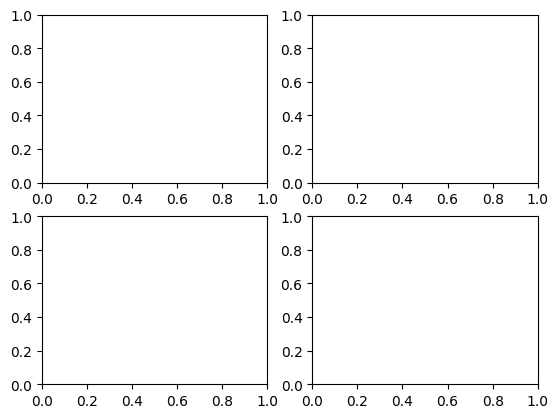

In [24]:
fig, axes = plt.subplots(2,2)

axes[0][0]
axes[0][1]
axes[1][0]
axes[1][1]

In [25]:
variables_numericas

['age_at_diagnosis',
 'mutation_count',
 'lymph_nodes_examined_positive',
 'overall_survival_months']

In [26]:
for i in range(2):
    variable1 = variables_numericas[i*2]
    variable2 = variables_numericas[i*2+1]
    print(variable1,i,0)
    print(variable2,i,1)

age_at_diagnosis 0 0
mutation_count 0 1
lymph_nodes_examined_positive 1 0
overall_survival_months 1 1


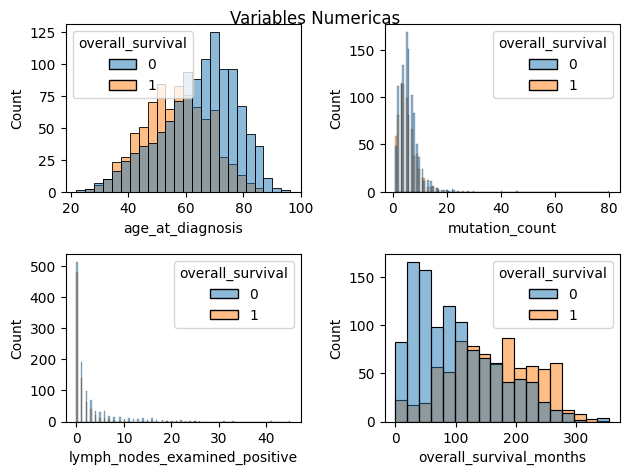

In [27]:
## Usar un ciclo for
fig, axes = plt.subplots(2,2)
for i in range(2):
    variable1 = variables_numericas[i*2]
    variable2 = variables_numericas[i*2+1]
    
    sns.histplot(data=data_clinica, x=variable1, hue="overall_survival", ax=axes[i][0])
    sns.histplot(data=data_clinica, x=variable2, hue="overall_survival", ax=axes[i][1])
    
    

fig.suptitle('Variables Numericas')
fig.tight_layout()
fig.subplots_adjust(top=0.95)   

### [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

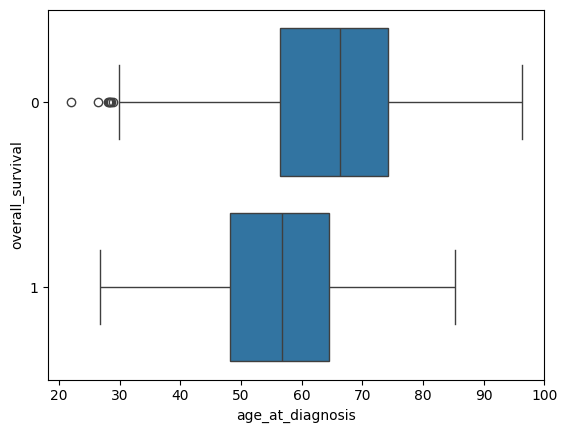

In [28]:
sns.boxplot(data=data_clinica, x="age_at_diagnosis", y="overall_survival", orient='h')
plt.show()

##### overall_survival_months 
Duration from the time of the intervention to death

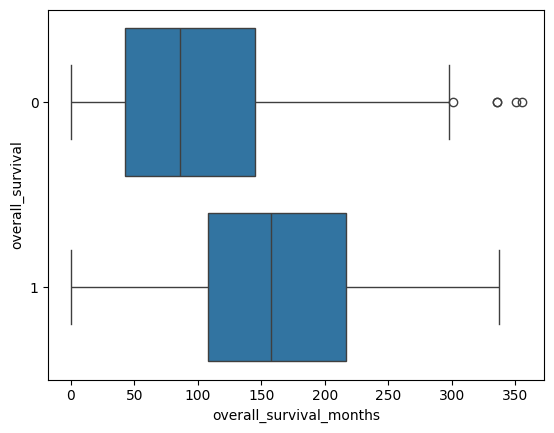

In [29]:
sns.boxplot(data=data_clinica, x="overall_survival_months", y="overall_survival", orient='h')
plt.show()

In [30]:
data_clinica['death_from_cancer'].unique()

array(['Living', 'Died of Disease', 'Died of Other Causes', nan],
      dtype=object)

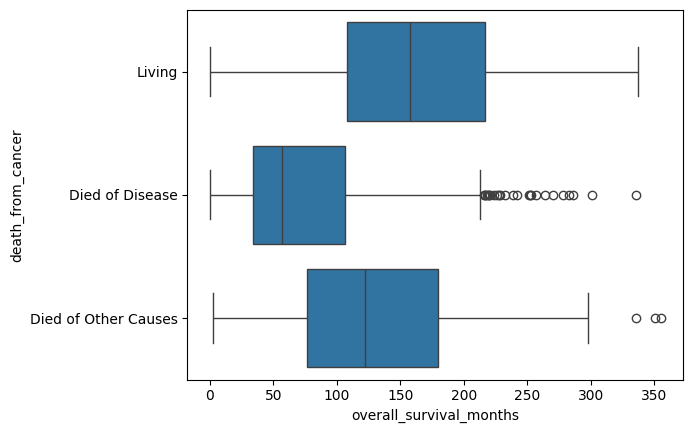

In [31]:
sns.boxplot(data=data_clinica, x="overall_survival_months", y="death_from_cancer", orient='h')
plt.show()

<Axes: xlabel='lymph_nodes_examined_positive', ylabel='overall_survival'>

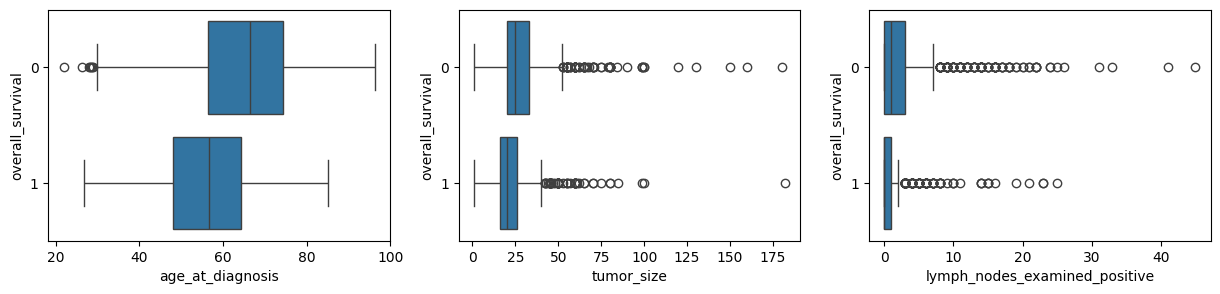

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))

sns.boxplot(data=data_clinica, x='age_at_diagnosis', y='overall_survival', orient='h', ax=ax[0])
sns.boxplot(data=data_clinica, x='tumor_size', y='overall_survival', orient='h', ax=ax[1])
sns.boxplot(data=data_clinica, x='lymph_nodes_examined_positive', y='overall_survival', orient='h', ax=ax[2])

## Ajustamos los titulos de las graficas

Text(0.5, 1.0, 'Sobrevivencia vs. ganglios linfáticos positivos')

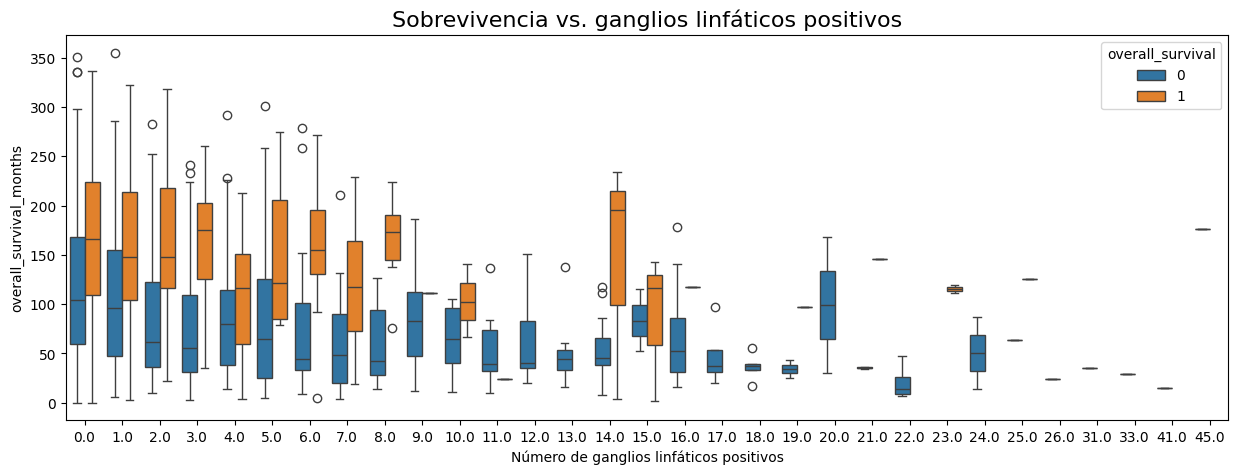

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival_months', hue='overall_survival', data=data_clinica)
plt.xlabel('Número de ganglios linfáticos positivos')
plt.title("Sobrevivencia vs. ganglios linfáticos positivos", fontsize=16)

In [34]:
data.shape

(1904, 693)

In [35]:
data_clinica.shape

(1904, 31)

In [36]:
data_clinica.drop(columns=['patient_id'], inplace=True)

In [37]:
matriz_correlacion = data_clinica.corr(numeric_only=True)

<Axes: >

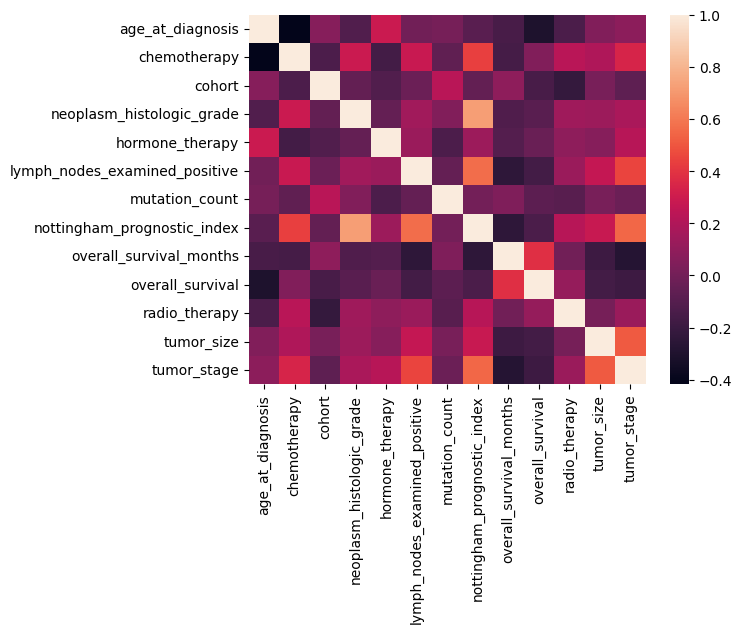

In [38]:
sns.heatmap(matriz_correlacion)

In [39]:
matriz_correlacion['overall_survival'].sort_values()

age_at_diagnosis                -0.303666
tumor_stage                     -0.188790
lymph_nodes_examined_positive   -0.164498
tumor_size                      -0.164361
cohort                          -0.149645
nottingham_prognostic_index     -0.138000
neoplasm_histologic_grade       -0.086601
mutation_count                  -0.077741
hormone_therapy                 -0.030401
chemotherapy                     0.045625
radio_therapy                    0.112083
overall_survival_months          0.384467
overall_survival                 1.000000
Name: overall_survival, dtype: float64

In [40]:
matriz_correlacion['overall_survival'].sort_values(ascending = False)

overall_survival                 1.000000
overall_survival_months          0.384467
radio_therapy                    0.112083
chemotherapy                     0.045625
hormone_therapy                 -0.030401
mutation_count                  -0.077741
neoplasm_histologic_grade       -0.086601
nottingham_prognostic_index     -0.138000
cohort                          -0.149645
tumor_size                      -0.164361
lymph_nodes_examined_positive   -0.164498
tumor_stage                     -0.188790
age_at_diagnosis                -0.303666
Name: overall_survival, dtype: float64

### [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

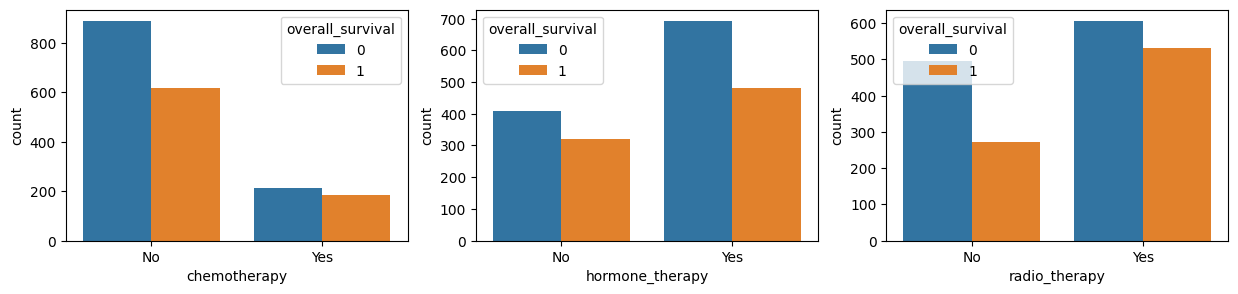

In [41]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))

sns.countplot(data=data_clinica, x='chemotherapy', hue='overall_survival', ax=ax[0])
sns.countplot(data=data_clinica, x='hormone_therapy', hue='overall_survival', ax=ax[1])
sns.countplot(data=data_clinica, x='radio_therapy', hue='overall_survival', ax=ax[2])
# Establecer las marcas en los ejes x
ax[0].set_xticks([0, 1])
ax[1].set_xticks([0, 1])
ax[2].set_xticks([0, 1])

# Establecer las etiquetas de las marcas en los ejes x
ax[0].set_xticklabels(['No', 'Yes'])
ax[1].set_xticklabels(['No', 'Yes'])
ax[2].set_xticklabels(['No', 'Yes'])

In [42]:
data.columns[520:]

Index(['pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut',
       'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=173)

### Explorando la data genetica

#### What are mRNA Z-Scores?
For mRNA expression data, The calculations of the relative expression of an individual gene and tumor to the gene's expression distribution in a reference population is done. That reference population is all samples in the study . The returned value indicates the number of standard deviations away from the mean of expression in the reference population (Z-score). This measure is useful to determine whether a gene is up- or down-regulated relative to the normal samples or all other tumor samples.

The formula is :
```
z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample
```

In [43]:
data_genetica = data[data.columns[31:520]].copy()

In [44]:
data_genetica.shape

(1904, 489)

In [45]:
data_genetica.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [46]:
## Agrega la columna overall_survival
data_genetica['overall_survival'] = data['overall_survival']

In [47]:
data_genetica.shape

(1904, 490)

In [48]:
data_genetica.columns

Index(['brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2',
       'nbn', 'nf1',
       ...
       'srd5a2', 'srd5a3', 'st7', 'star', 'tnk2', 'tulp4', 'ugt2b15',
       'ugt2b17', 'ugt2b7', 'overall_survival'],
      dtype='object', length=490)

In [49]:
data_genetica.sample(10)

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,overall_survival
389,-0.3723,0.4263,-0.2048,-0.2527,-0.0846,-1.3588,-0.0492,0.2673,0.2055,-1.0866,...,0.0849,-0.9607,0.2345,-0.7455,-0.3171,-1.0538,-0.2902,0.2693,-0.9752,1
583,-0.3575,0.2745,0.2389,-0.4245,-1.8884,-0.0170,0.8651,-0.0831,-1.3711,0.7735,...,0.3197,5.0124,-1.2215,0.3407,0.0742,0.0864,-0.6999,-0.4031,-0.4157,0
1696,-1.0420,-0.6646,0.1655,0.4809,2.7202,0.4291,0.7330,0.2248,0.4658,-0.9978,...,-0.3403,-0.9446,-1.0501,0.6828,-0.3131,-1.2129,-0.6808,0.1686,-0.8031,0
577,1.7325,-0.7262,0.7318,0.9388,-1.0443,0.9355,1.0096,-0.2950,-0.4077,-1.2686,...,-0.1957,0.3336,-0.1379,-1.3783,0.5178,0.6421,-0.3959,-0.7736,-0.8732,0
809,-0.7339,-0.2918,-1.5004,-0.7554,0.9646,-0.4094,0.5759,0.9137,-1.3100,-0.0383,...,1.1662,-0.3196,-0.3901,-0.7980,1.0697,-0.3272,-0.7635,-0.4895,-0.8612,0
1405,-0.9721,1.2320,0.0628,0.0206,0.5913,-0.2706,0.9521,-0.7056,1.6918,-1.0662,...,0.6695,0.4553,2.4950,-0.4856,0.4776,0.7383,-0.5887,-0.6789,-0.7013,1
337,0.1938,-1.6391,0.2993,-0.7858,-0.6356,-1.0095,1.9853,-0.0511,0.2007,-0.7741,...,0.9823,-0.3307,-0.2796,0.1032,0.7811,-0.4724,-0.0734,-0.4890,-0.6223,1
488,-1.1427,-1.0414,1.8637,1.3807,-0.4855,-0.0324,0.1629,-1.1197,-0.8696,-1.1172,...,1.0932,-0.1905,-0.2431,-0.2852,-2.1933,-1.9921,-0.6886,-0.1067,0.9113,0
1784,1.5964,-0.4328,0.9779,0.2189,1.1273,-0.4059,0.1476,-0.1360,0.0206,0.5414,...,-1.7520,1.8917,1.7644,1.2581,-1.5668,0.1543,-0.6268,0.0757,2.0755,1
1317,0.1236,-0.0092,0.0032,0.6549,-0.4007,0.2261,0.8560,-1.2368,0.3797,1.6371,...,0.8863,1.2289,0.7330,0.1553,0.1899,0.4492,-0.4431,0.1323,-0.8957,0


In [50]:
correlacion_genetica = data_genetica.corr()

In [51]:
correlacion_genetica['overall_survival'].sort_values(ascending = False)

overall_survival    1.000000
hsd17b11            0.216095
cdkn2c              0.197379
jak1                0.194412
spry2               0.184942
                      ...   
tnk2               -0.155701
tsc2               -0.161890
map4               -0.165276
kmt2c              -0.171925
gsk3b              -0.186323
Name: overall_survival, Length: 490, dtype: float64

Text(0.5, 1.0, 'Heatmap de expresion genetica')

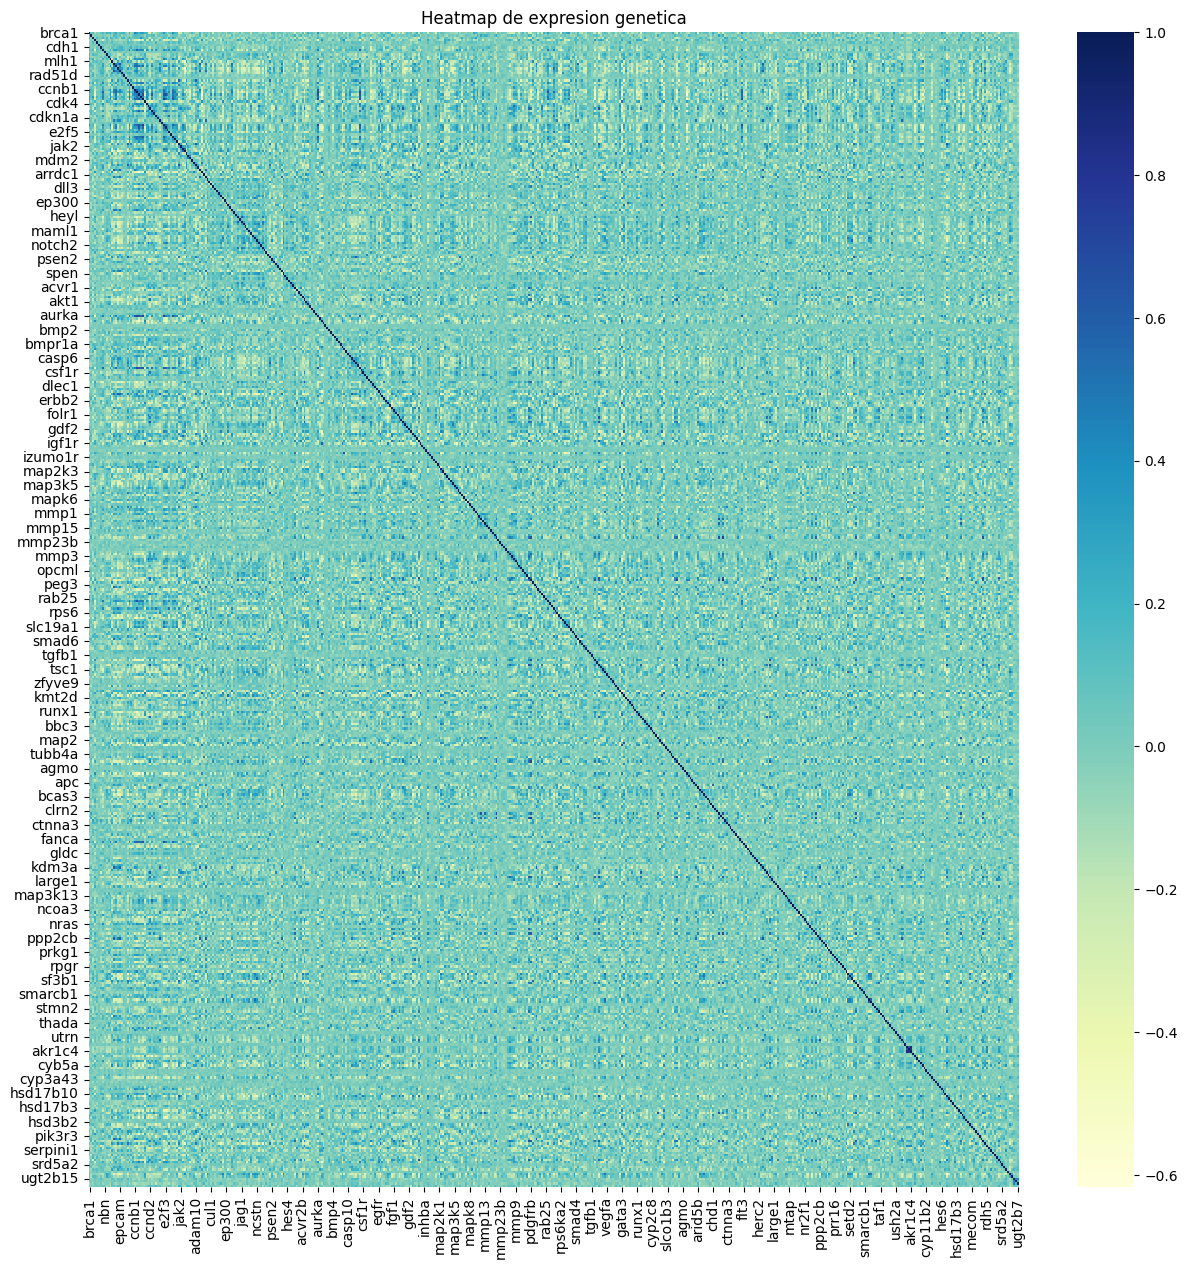

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(correlacion_genetica.drop('overall_survival', axis=1), cmap ="YlGnBu")
plt.title('Heatmap de expresion genetica')

# Tarea 4
- Usar subplots para graficar la distibución de las 3 variables geneticas('cdkn2c', 'jak1', 'spry2') que hacen falta.Recuerda que el dataset a utilizar es `data_genetica`
- Escribir conclusiones del analisis utilizando Markdown

In [53]:
top4_genes = ['hsd17b11', 'cdkn2c', 'jak1', 'spry2']

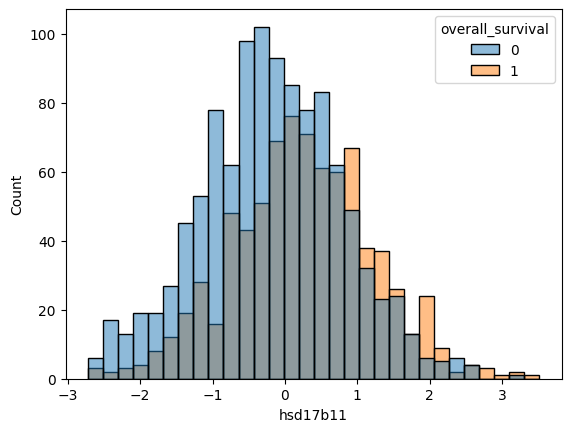

In [54]:
sns.histplot(data=data_genetica, x=top4_genes[0], hue="overall_survival")
plt.show()

0 cdkn2c
1 jak1
2 spry2


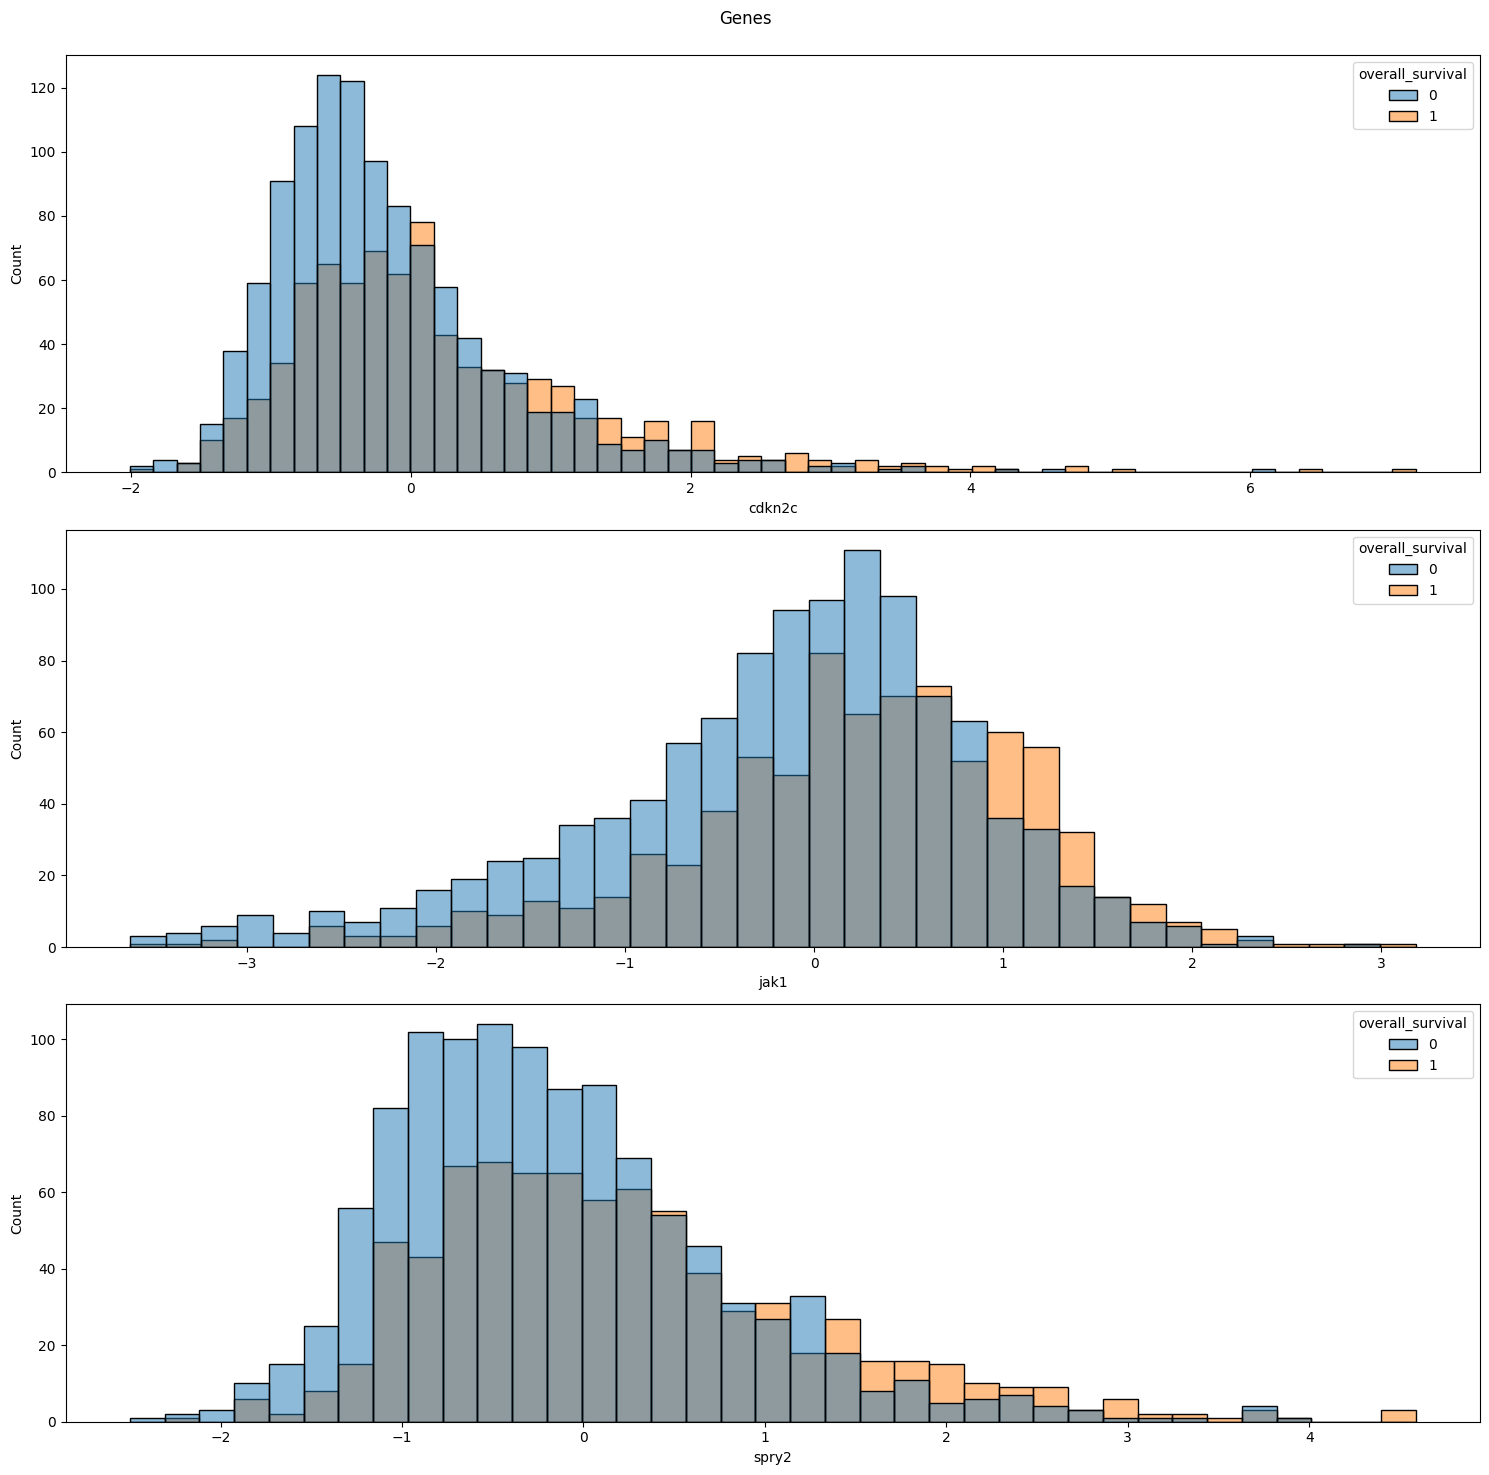

In [55]:
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
for i, gene in enumerate(top4_genes[1:]):
    print(i,gene)
    sns.histplot(data=data_genetica, x=gene, hue='overall_survival', ax=ax[i])
    ## Tu codigo aqui
    
fig.suptitle('Genes')
fig.tight_layout()
fig.subplots_adjust(top=0.95)   
plt.show()

# Extra, Accesando a NCBI con BioPython
Vamos a buscar informacion del gen que mas correlacion tiene 

In [56]:
correlacion_genetica['overall_survival'].sort_values(ascending = False)

overall_survival    1.000000
hsd17b11            0.216095
cdkn2c              0.197379
jak1                0.194412
spry2               0.184942
                      ...   
tnk2               -0.155701
tsc2               -0.161890
map4               -0.165276
kmt2c              -0.171925
gsk3b              -0.186323
Name: overall_survival, Length: 490, dtype: float64

In [57]:
from Bio import Entrez, SeqIO
Entrez.email = 'mel.marroquin@gmail.com' ### tu email aqui

In [62]:
def nbci_get_gen_info(gene):
    print(gene)
    handle=Entrez.esearch(db='pubmed', term='Single-cell sequencing in stem cell biology')
    record=Entrez.read(handle)
    #print(record.keys())
    handle = Entrez.esearch(db='gene', term=gene) ### el gen a buscar aqui
    records = Entrez.read(handle)
    #print(records['IdList'])
    handle=Entrez.efetch(db='gene', id='9370',rettype='fasta', retmode='json')
    print(handle.read().decode(),'\n')
    

In [63]:
for gene in top4_genes:
    nbci_get_gen_info(gene)

hsd17b11

1. ADIPOQ
Official Symbol: ADIPOQ and Name: adiponectin, C1Q and collagen domain containing [Homo sapiens (human)]
Other Aliases: ACDC, ACRP30, ADIPQTL1, ADPN, APM-1, APM1, GBP28
Other Designations: adiponectin; 30 kDa adipocyte complement-related protein; adipocyte complement-related 30 kDa protein; adipose most abundant gene transcript 1 protein; adipose specific collagen-like factor; gelatin-binding protein 28
Chromosome: 3; Location: 3q27.3
Annotation: Chromosome 3 NC_000003.12 (186842710..186858463)
MIM: 605441
ID: 9370

 

cdkn2c

1. ADIPOQ
Official Symbol: ADIPOQ and Name: adiponectin, C1Q and collagen domain containing [Homo sapiens (human)]
Other Aliases: ACDC, ACRP30, ADIPQTL1, ADPN, APM-1, APM1, GBP28
Other Designations: adiponectin; 30 kDa adipocyte complement-related protein; adipocyte complement-related 30 kDa protein; adipose most abundant gene transcript 1 protein; adipose specific collagen-like factor; gelatin-binding protein 28
Chromosome: 3; Location: 3q27.

# Conclusiones

* hsd17b11
    ##### El gen, tiene una concentracion mayor a la media, se puede observer que la mayorira de los datos, convergen en la media, ademas tiene mas casos de no supervicencia.
* cdkn2c
  ##### El gen, tiene una concentracion menor a la media, se puede observer que la mayorira de los datos, convergen hacia la derecha, y muestra que tiene varios casos atipicos
* jak1
  ##### El gen, tiene una concentracion menor a la media, se puede observer que la mayorira de los datos, convergen hacia la izquierda
* spry2
  ##### El gen, tiene una concentracion menor a la media, se puede observer que la mayorira de los datos, convergen hacia la derecha, y muestra que tiene varios casos atipicos